In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [31]:
(training_images, training_labels), (testing_image, testing_labels) = datasets.cifar10.load_data()

### Normalize data

In [32]:
training_images, testing_image = training_images/255, testing_image/255  # pixel range is of the images are 0 t0 255 (0-lowest brightness 255-highest brightness) so to getting all values between 0-1, devide it by 255

### Assigning names to labels

In [33]:
class_names = ['Airplanes', 'Cars', 'Birds', 'Cats', 'Deer', 'Dogs', 'Frogs', 'Horses', 'Ships', 'Trucks']

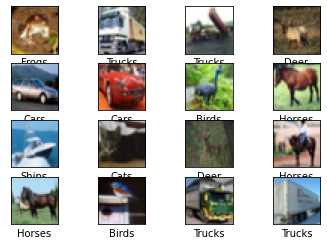

In [34]:
for i in range(16):
    plt.subplot(4,4,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

### Building & training neural network

In [35]:
training_images = training_images[:50000]
training_labels = training_labels[:50000]
testing_image = testing_image[:4000]
testing_labels = testing_labels[:4000]
# this is optional. this will reduce the amount of images used to train neural network. doing this for saving time

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_image, testing_labels)) 


# This specifies the number of times the entire training dataset should be passed forward and backward through the neural network. Training for multiple epochs allows the model to learn from the data over multiple iterations



Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.5174 - accuracy: 0.4445 - val_loss: 1.2333 - val_accuracy: 0.5567
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1516 - accuracy: 0.5926 - val_loss: 1.0714 - val_accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0114 - accuracy: 0.6455 - val_loss: 1.0406 - val_accuracy: 0.6378
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9187 - accuracy: 0.6773 - val_loss: 0.9259 - val_accuracy: 0.6697
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8462 - accuracy: 0.7049 - val_loss: 0.9293 - val_accuracy: 0.6752
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7877 - accuracy: 0.7256 - val_loss: 0.8989 - val_accuracy: 0.6837
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7422 - accuracy: 0.7409 - val_loss: 0.9123 -

In [38]:
loss, accuracy = model.evaluate(testing_image, testing_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

125/125 [==============================] - 1s 4ms/step - loss: 0.8997 - accuracy: 0.7103
Loss: 0.8996979594230652
Accuracy: 0.7102500200271606


In [41]:
model.save('image_classifier_model')

INFO:tensorflow:Assets written to: image_classifier_model\assets


INFO:tensorflow:Assets written to: image_classifier_model\assets
